## Data Preparation and EDA

In [105]:
# Reading the data and putting it into a table
import pandas as pd
df = pd.read_csv('penguins_lter.csv')
display(df)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [106]:
# Identify missing values in each column  
print(df.isnull().sum())

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64


We can observe that there are missing data from this dataset.

In [107]:
# Finding rows that have null culmen length
df[df['Culmen Length (mm)'].isna()]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like all the missing culmen length, culmen depth, flipper length, and body mass belong to the same two samples.

In [108]:
# Finding out the unique values for Sex
df['Sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

We can see that there are missing data in the Sex column ('nan') and invalid data ('.', which we know is not a valid Sex). As sex is a categorical value, we can use the most common value to replace the missing and invalid values.

In [109]:
# Getting data for Sex
df['Sex'].describe()

count      334
unique       3
top       MALE
freq       168
Name: Sex, dtype: object

From this, we now know that the most common value for Sex is MALE.

In [110]:
# Filling MALE for all rows with null Sex
df['Sex'].fillna('MALE', inplace=True)

We have replaced the 'nan' with 'MALE', now let's locate and replace the row with '.' value.

In [111]:
# Locating rows with invalid Sex value
df.loc[df['Sex'] == '.']

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
336,PAL0910,117,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N36A1,Yes,12/1/09,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444,NaN


In [112]:
# Replacing the invalid value with the most common one
df['Sex'].at[336] = 'MALE'
df['Sex'].at[336]

'MALE'

Now, we have successfully replaced the sex value in row 336 with MALE. We can analyze this column further by plotting it into a bar graph.

<AxesSubplot:title={'center':'Penguin Sex Distribution'}, xlabel='Sex', ylabel='Number of Penguins'>

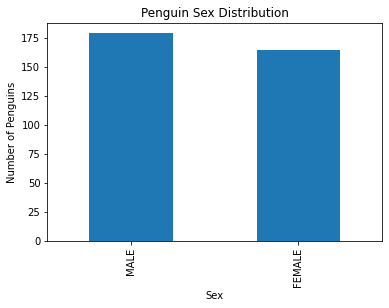

In [113]:
# Plotting a bar chart for sex
df['Sex'].value_counts().plot.bar(xlabel='Sex', ylabel='Number of Penguins', title='Penguin Sex Distribution')

It is observed that more male penguins are taken as research subject.

In [114]:
# Finding rows where Delta 15 N is null
df[df['Delta 15 N (o/oo)'].isna()]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,MALE,NaN,NaN,Adult not sampled.
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,11/9/07,34.1,18.1,193.0,3475.0,MALE,NaN,NaN,No blood sample obtained.
11,PAL0708,12,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N6A2,Yes,11/9/07,37.8,17.3,180.0,3700.0,MALE,NaN,NaN,No blood sample obtained.
12,PAL0708,13,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N7A1,Yes,11/15/07,41.1,17.6,182.0,3200.0,FEMALE,NaN,NaN,Not enough blood for isotopes.
13,PAL0708,14,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N7A2,Yes,11/15/07,38.6,21.2,191.0,3800.0,MALE,NaN,NaN,Not enough blood for isotopes.
15,PAL0708,16,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N8A2,Yes,11/16/07,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN,Not enough blood for isotopes.
39,PAL0708,40,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N25A2,No,11/13/07,39.8,19.1,184.0,4650.0,MALE,NaN,NaN,Nest never observed with full clutch. Not enou...
41,PAL0708,42,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N26A2,Yes,11/16/07,40.8,18.4,195.0,3900.0,MALE,NaN,NaN,Not enough blood for isotopes.
46,PAL0708,47,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N29A1,Yes,11/13/07,41.1,19.0,182.0,3425.0,MALE,NaN,NaN,Not enough blood for isotopes.


We can observe from the rows with missing Delta 15 N (o/oo) and Delta 13 C (o/oo) that most of them are missing because the researcher did not get enough blood for isotopes (As seen from the 'Comments'). These missing values can also be interpolated using Pandas' built-in interpolation function.

In [115]:
# Using interpolation to best fill in the null values
df = df.interpolate(method='linear', limit_direction='forward')

In [116]:
# Checking the table
display(df)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.70,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.40,186.0,3800.0,FEMALE,8.949560,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.00,195.0,3250.0,FEMALE,8.368210,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,38.5,18.65,194.0,3350.0,MALE,8.567360,-25.32864,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.30,193.0,3450.0,FEMALE,8.766510,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,47.0,14.00,214.5,4887.5,MALE,8.201675,-26.17185,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.30,215.0,4850.0,FEMALE,8.411510,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.70,222.0,5750.0,MALE,8.301660,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.80,212.0,5200.0,FEMALE,8.242460,-26.11969,NaN


Using forward interpolation however prevents row 0 from being interpolated since there are no previous rows to interpolate from. In this case, we can use the mean instead.

In [117]:
# Calculating the mean values for isotopes
mean15N = df[['Delta 15 N (o/oo)']].mean()
mean13C = df[['Delta 13 C (o/oo)']].mean()

# Filling the null with the mean
df.at[0, 'Delta 15 N (o/oo)'] = mean15N
df.at[0, 'Delta 13 C (o/oo)'] = mean13C

df['Delta 15 N (o/oo)'].describe()

count    344.000000
mean       8.741758
std        0.552539
min        7.632200
25%        8.302148
50%        8.656345
75%        9.185755
max       10.025440
Name: Delta 15 N (o/oo), dtype: float64

<AxesSubplot:>

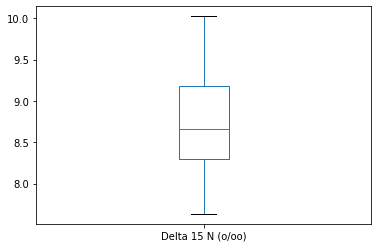

In [118]:
# Box plot for Delta 15 N
df['Delta 15 N (o/oo)'].plot.box()

In [119]:
df['Delta 13 C (o/oo)'].describe()

count    344.000000
mean     -25.665982
std        0.790026
min      -27.018540
25%      -26.285460
50%      -25.795390
75%      -25.039997
max      -23.787670
Name: Delta 13 C (o/oo), dtype: float64

<AxesSubplot:>

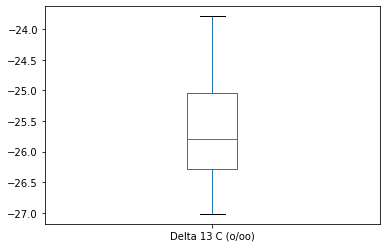

In [120]:
# Box plot for Delta 13 C
df['Delta 13 C (o/oo)'].plot.box()

Both Delta 15 N (o/oo) and Delta 13 C (o/oo) have no big outliers that we need to deal with.

We still have missing values in 'Comments'. Before replacing them, we can check examples of comments provided by the researcher in this dataset.

In [121]:
df['Comments'].unique()

array(['Not enough blood for isotopes.', nan, 'Adult not sampled.',
       'Nest never observed with full clutch.',
       'No blood sample obtained.',
       'No blood sample obtained for sexing.',
       'Nest never observed with full clutch. Not enough blood for isotopes.',
       'Sexing primers did not amplify. Not enough blood for isotopes.'],
      dtype=object)

The comments provided describe the sampled penguin in exceptional cases (i.e not enough blood sample obtained). The nan in this case clearly describes that the researcher sees no need to provide any comments toward the sampled penguin. Thus, we can replace the nan values with 'No comments' instead to eliminate empty data.

In [122]:
df['Comments'].fillna('No comments', inplace=True)
df.isnull().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Comments               0
dtype: int64

All the missing data has been replaced.

<AxesSubplot:title={'center':'Distribution of Comments'}, ylabel='Comment number'>

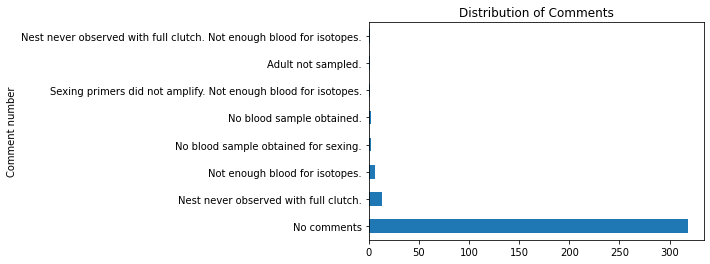

In [123]:
# !pip install squarify
# import squarify
from matplotlib import pyplot as plt

# Further analysis of Comments:
comment_distribution = df['Comments'].value_counts()
comment_distribution.plot.barh(ylabel='Comment', xlabel='Comment number', title='Distribution of Comments')
# fig = plt.figure(figsize=(10,5))
# ax = fig.add_subplot(111) 
# squarify.plot(sizes=comment_distribution, label=comment_distribution.index, alpha=0.9, pad=True, ax=ax)
# plt.title("Treemap showing distribution of comments");

We can observe that the amount of samples without comments far exceed the rest. This implies that majority of the penguins sampled does not require any exceptional comments.

For the bivariate EDA, I will be taking a closer look at body mass and how they relate with the other data.

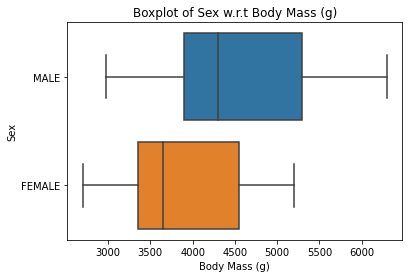

In [124]:
import seaborn as sns
sns.boxplot(data=df, x='Body Mass (g)', y='Sex', orient='h')
plt.title("Boxplot of Sex w.r.t Body Mass (g)");

We can see from this plot that sex could be a factor for body mass, as male penguins are generally heavier when compared to female penguins.

Text(0.5, 1.0, 'Boxplot of Delta 15 N (o/oo) w.r.t Sex')

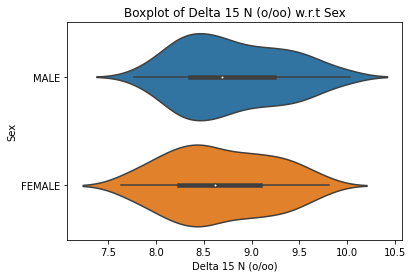

In [125]:
sns.violinplot(data=df, x='Delta 15 N (o/oo)', y='Sex', orient='h')
plt.title("Boxplot of Delta 15 N (o/oo) w.r.t Sex")

From this plot, the distribution of sex between males and females with respect to the Delta 15 N (o/oo) is similar, thus sex cannot be classified as a distinguishing factor for Delta 15 N (o/oo).

Text(0.5, 1.0, 'Regression plot for body mass (g) w.r.t Delta 15 N (o/oo)')

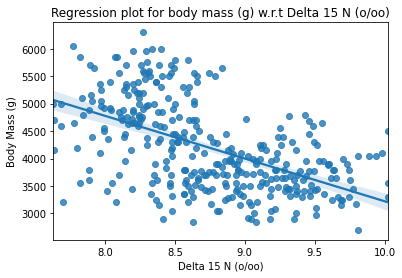

In [126]:
sns.regplot(data=df, x='Delta 15 N (o/oo)', y='Body Mass (g)')
plt.title('Regression plot for body mass (g) w.r.t Delta 15 N (o/oo)')

The above plot shows that the higher the body mass of the penguin, the less the value of its Delta 15 N (o/oo).

Text(0.5, 1.0, 'Regression plot for body mass (g) w.r.t Delta 13 C (o/oo)')

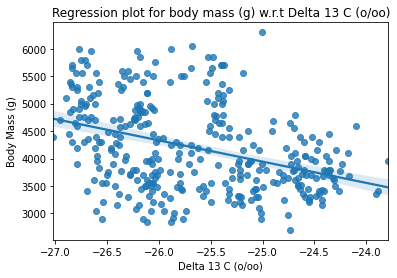

In [127]:
sns.regplot(data=df, x='Delta 13 C (o/oo)', y='Body Mass (g)')
plt.title('Regression plot for body mass (g) w.r.t Delta 13 C (o/oo)')

We again see that the body mass of the penguin has a negative correlation with the Delta 13 C (o/oo).

Text(0.5, 1.0, 'Boxplot for body mass w.r.t species')

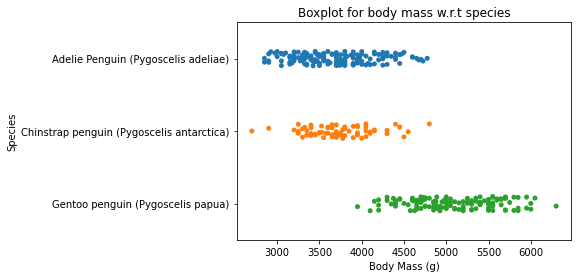

In [128]:
sns.stripplot(data=df, x='Body Mass (g)', y='Species')
plt.title('Boxplot for body mass w.r.t species')

From the above plot, we can see that the Gentoo Penguin is overall the heaviest of the three species.

Text(0.5, 1.0, 'Boxplot for body mass w.r.t culmen depth')

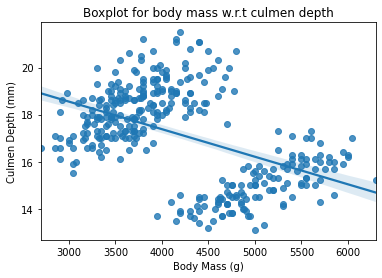

In [129]:
sns.regplot(data=df, x='Body Mass (g)', y='Culmen Depth (mm)')
plt.title('Boxplot for body mass w.r.t culmen depth')

<AxesSubplot:>

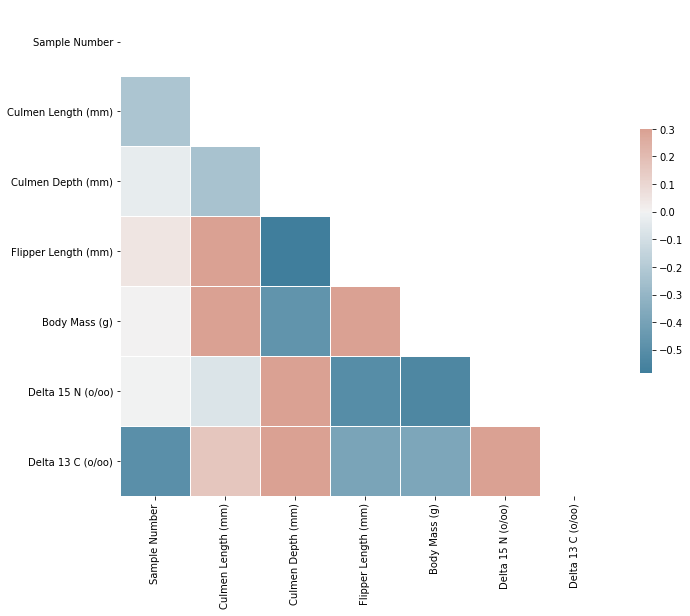

In [130]:
import numpy as np
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

This heatmap shows that the Culmen Length (mm) and Flipper Length (mm) correlates with the penguin's body mass.

## Mean and Standard Deviation

In [133]:
# Aggregate function to calculate mean and placing them into a table
df[[
    'Species', 
    'Culmen Length (mm)', 
    'Culmen Depth (mm)', 
    'Flipper Length (mm)', 
    'Body Mass (g)', 
    'Delta 15 N (o/oo)', 
    'Delta 13 C (o/oo)'
]].groupby('Species').agg(culmen_length_in_mm=pd.NamedAgg(column='Culmen Length (mm)', aggfunc=np.mean),
                          culmen_depth_in_mm=pd.NamedAgg(column='Culmen Depth (mm)', aggfunc=np.mean),
                          flipper_length_in_mm=pd.NamedAgg(column='Flipper Length (mm)', aggfunc=np.mean),
                          body_mass_in_g=pd.NamedAgg(column='Body Mass (g)', aggfunc=np.mean),
                          delta_15_N=pd.NamedAgg(column='Delta 15 N (o/oo)', aggfunc=np.mean),
                          delta_13_c=pd.NamedAgg(column='Delta 13 C (o/oo)', aggfunc=np.mean))

,culmen_length_in_mm,culmen_depth_in_mm,flipper_length_in_mm,body_mass_in_g,delta_15_N,delta_13_c
Species,,,,,,
Adelie Penguin (Pygoscelis adeliae),38.789474,18.348355,189.980263,3698.355263,8.872627,-25.748868
Chinstrap penguin (Pygoscelis antarctica),48.833824,18.420588,195.823529,3733.088235,9.359156,-24.546542
Gentoo penguin (Pygoscelis papua),47.500806,14.974194,217.165323,5074.495968,8.242764,-26.178265


The above table shows that the Adelie Penguin generally have shorter culmens compared to the Chinstrap and Gentoo Penguins. The Gentoo Penguin is shown to have culmens with less depth, while also having longer flippers and heavier body mass when compared to the other two species. The values for Delta 15 N (o/oo) in general is not too far apart, although the Chinstrap Penguin on average seems to have a higher value, followed by the Adelie Penguin, with the Gentoo Penguin having the least. The same thing occurs with the value for Delta 13 C, with the Chinstrap Penguin once again having the highest, followed by the Adelie Penguins and the Gentoo Penguin with once again the least.

In [134]:
# Aggregate function to calculate standard deviation and placing them into a table
df[[
    'Species', 
    'Culmen Length (mm)', 
    'Culmen Depth (mm)', 
    'Flipper Length (mm)', 
    'Body Mass (g)', 
    'Delta 15 N (o/oo)', 
    'Delta 13 C (o/oo)'
]].groupby('Species').agg(culmen_length_in_mm=pd.NamedAgg(column='Culmen Length (mm)', aggfunc=np.std),
                          culmen_depth_in_mm=pd.NamedAgg(column='Culmen Depth (mm)', aggfunc=np.std),
                          flipper_length_in_mm=pd.NamedAgg(column='Flipper Length (mm)', aggfunc=np.std),
                          body_mass_in_g=pd.NamedAgg(column='Body Mass (g)', aggfunc=np.std),
                          delta_15_N=pd.NamedAgg(column='Delta 15 N (o/oo)', aggfunc=np.std),
                          delta_13_c=pd.NamedAgg(column='Delta 13 C (o/oo)', aggfunc=np.std))

,culmen_length_in_mm,culmen_depth_in_mm,flipper_length_in_mm,body_mass_in_g,delta_15_N,delta_13_c
Species,,,,,,
Adelie Penguin (Pygoscelis adeliae),2.654676,1.212865,6.526026,457.929322,0.428801,0.606987
Chinstrap penguin (Pygoscelis antarctica),3.339256,1.135395,7.131894,384.335081,0.366794,0.238809
Gentoo penguin (Pygoscelis papua),3.069639,0.981195,6.463066,502.348143,0.263502,0.539694


The Chinstrap Penguin seems to have the most values deviating from the mean in its culmen length and flipper length compared to the other two species. For the Adelie Penguin, they seem to have the highest standard deviation value in the culmen depth and the isotope value measurements (delta 15 N and delta 13 C). The Gentoo Penguin experiences the same event in their body mass measurements.

## Correlation Between Numerical Data

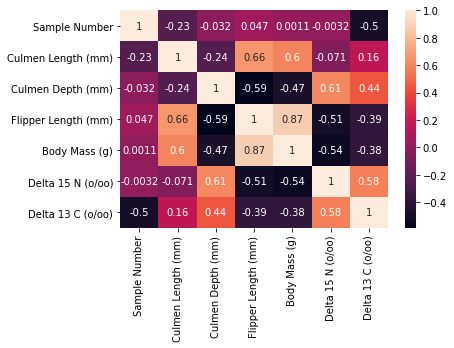

In [135]:
corr = df.corr()
ax = sns.heatmap(corr, annot=True)

The only strong correlation observed among the numerical values is observed between the penguin's flipper length and their body mass. We can observe this correlation further with a regression plot.

Text(0.5, 1.0, 'Regression plot for body mass (g) w.r.t Flipper Length (mm)')

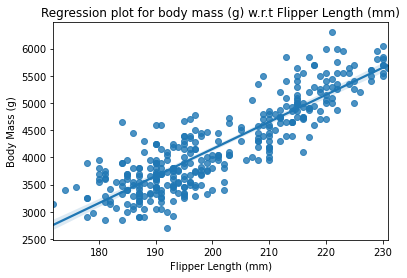

In [136]:
sns.regplot(data=df, x='Flipper Length (mm)', y='Body Mass (g)')
plt.title('Regression plot for body mass (g) w.r.t Flipper Length (mm)')

Let's also try plotting the pair with negative correlation, such as Body Mass and Culmen Depth.

Text(0.5, 1.0, 'Regression plot for body mass (g) w.r.t Culmen Depth (mm)')

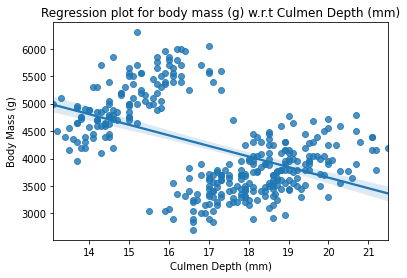

In [144]:
sns.regplot(data=df, x='Culmen Depth (mm)', y='Body Mass (g)')
plt.title('Regression plot for body mass (g) w.r.t Culmen Depth (mm)')

2 clear clusters are formed from the plot, which bodes well for the K-Means Clustering process.

## K-Means Clustering

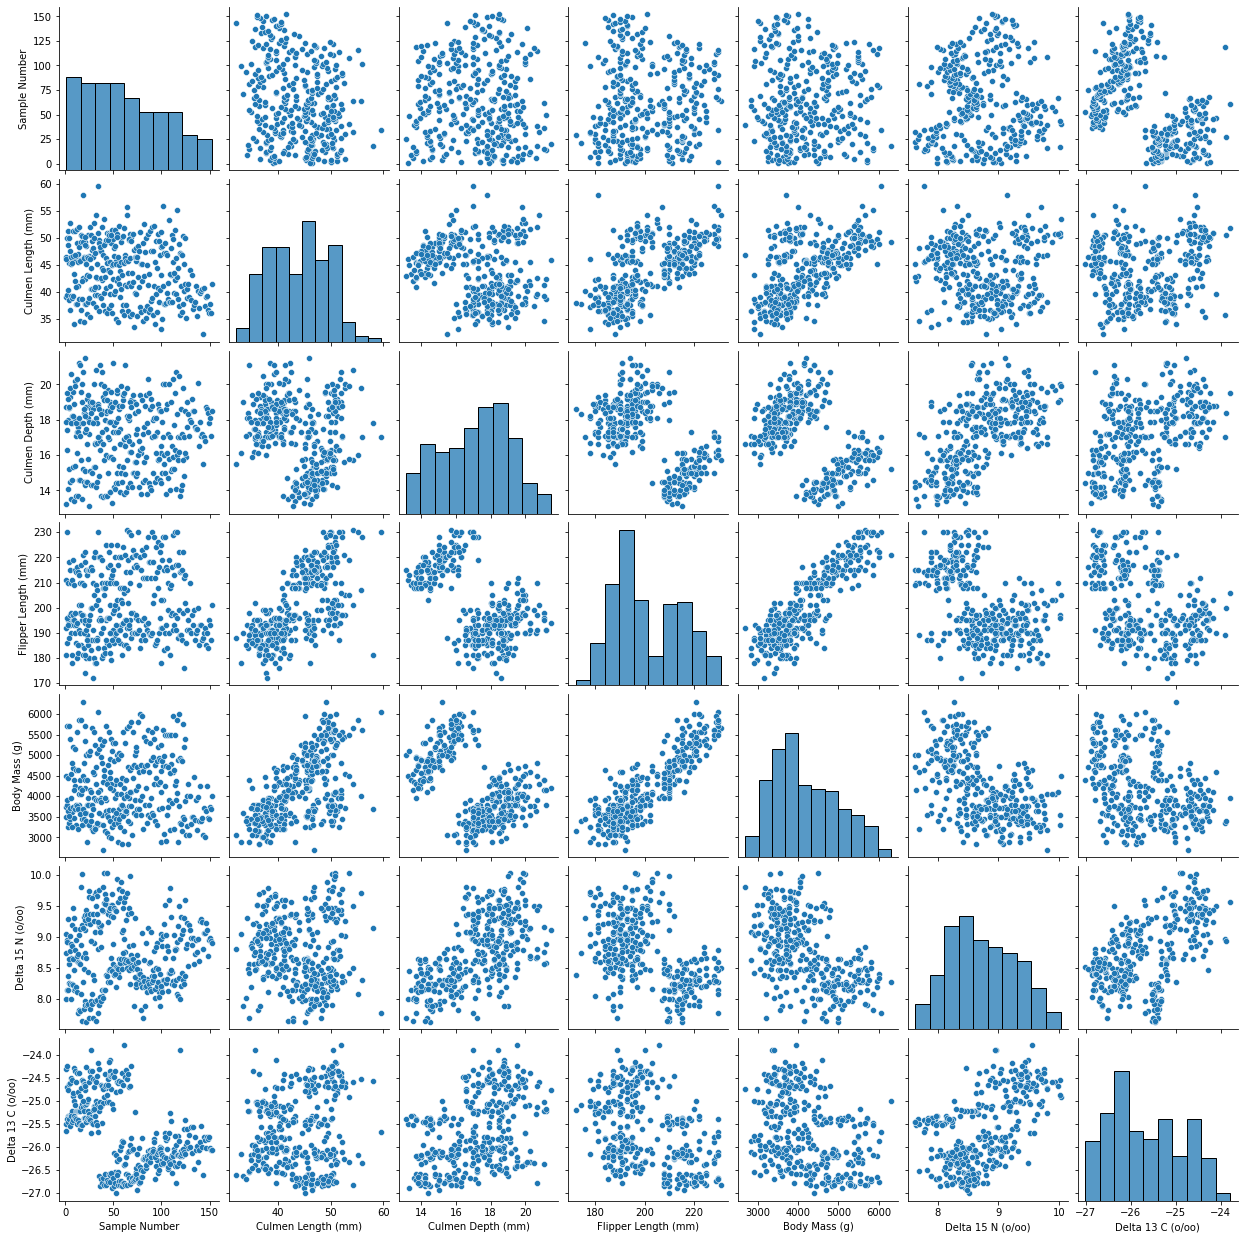

In [137]:
data_to_cluster = df
sns.pairplot(data_to_cluster)

Clear clusters appear between:
1. Culmen Depth (mm) and Flipper Length (mm)
2. Culmen Depth (mm) and Body Mass (g) <br>
We can focus on the second pair because it concerns the body mass, which we have been focusing on from the previous parts.

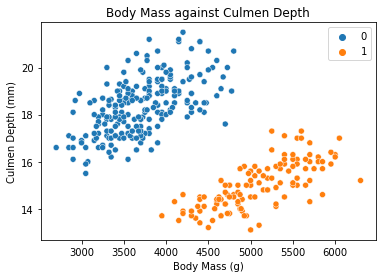

In [138]:
# !pip install sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

# scale the data using minmax scale
k_cluster_data = df[["Body Mass (g)", "Culmen Depth (mm)"]]
scaled_data = minmax_scale(k_cluster_data)

# initialize KMeans object with number of desired clusters
k_means = KMeans(n_clusters=2)

# fit and transform k_means object to scaled data
k_means.fit_transform(scaled_data)

# plot the clusters
sns.scatterplot(data=k_cluster_data, x="Body Mass (g)", y="Culmen Depth (mm)", hue=k_means.labels_.astype(int))
plt.title("Body Mass against Culmen Depth");

The K-Means clustering use 2 clusters as only 2 general clusters are observed during the pair plots and the bivariate EDA (using regression plot). The possible limitation for the above clustering is that the clusters itself isn't tightly packed and are a bit too spread out in general. There are 2 clear clusters however, showing the negative correlation between Culmen Depth and Body Mass, as shown in the bivariate EDA.

## PCA

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Culmen Length (mm)', 
            'Culmen Depth (mm)', 
            'Flipper Length (mm)', 
            'Body Mass (g)', 
            'Delta 15 N (o/oo)', 
            'Delta 13 C (o/oo)']
x = df.loc[:, features].values
y = df.loc[:, ['Species']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC 1', 'PC 2'])
principal_df

,PC 1,PC 2
0,-1.561827,-0.866539
1,-1.603021,-0.033922
2,-1.012229,-0.714089
3,-1.368151,-0.722086
4,-1.724073,-0.730084
...,...,...
339,2.316305,-0.252680
340,2.070098,-0.084682
341,2.804038,0.819061
342,2.101443,-0.289685


The above table shows how the 6-dimension numerical values can be reduced to a 2-dimensional Principal Components. 

In [140]:
final_df = pd.concat([principal_df, df[['Species']]], axis = 1)
final_df

,PC 1,PC 2,Species
0,-1.561827,-0.866539,Adelie Penguin (Pygoscelis adeliae)
1,-1.603021,-0.033922,Adelie Penguin (Pygoscelis adeliae)
2,-1.012229,-0.714089,Adelie Penguin (Pygoscelis adeliae)
3,-1.368151,-0.722086,Adelie Penguin (Pygoscelis adeliae)
4,-1.724073,-0.730084,Adelie Penguin (Pygoscelis adeliae)
...,...,...,...
339,2.316305,-0.252680,Gentoo penguin (Pygoscelis papua)
340,2.070098,-0.084682,Gentoo penguin (Pygoscelis papua)
341,2.804038,0.819061,Gentoo penguin (Pygoscelis papua)
342,2.101443,-0.289685,Gentoo penguin (Pygoscelis papua)


We can attach each row of the data to the species it belongs to, so that we can get a clear view of the plot spread according to each species.

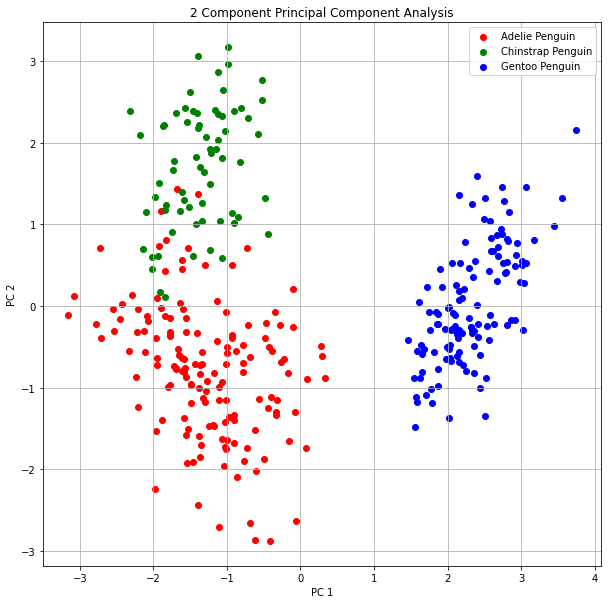

In [141]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('2 Component Principal Component Analysis')

species = ['Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)']
species2 = ['Adelie Penguin', 'Chinstrap Penguin', 'Gentoo Penguin']
colors = ['r', 'g', 'b']
for species, color in zip(species,colors):
    indicesToKeep = final_df['Species'] == species
    ax.scatter(final_df.loc[indicesToKeep, 'PC 1'], 
               final_df.loc[indicesToKeep, 'PC 2'], 
               c = color)
ax.legend(species2)
ax.grid()

# Reference : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

The above plot shows how the numerical values (6-dimensions) can be reduced to 2-dimensions, separated by their species.

In [142]:
pca.explained_variance_ratio_

array([0.56190068, 0.23879793])

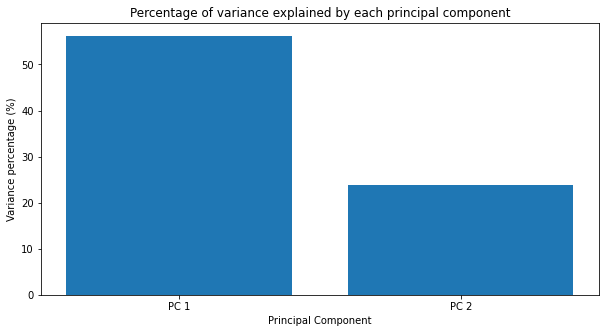

In [143]:
fig = plt.figure(figsize = (10, 5))
 
PC = ['PC 1', 'PC 2']
plt.bar(PC, pca.explained_variance_ratio_*100)
plt.xlabel("Principal Component")
plt.ylabel("Variance percentage (%)")
plt.title("Percentage of variance explained by each principal component")
plt.show()

PC1, after the  PCA process will account for about 56% of the total information, while PC2 contains about 24%. Altogether, the PCA contains about 80% of the total information. This shows the limitation of the PCA, where about 20% of the information is unusable (could be due to the smaller size of the sample data).